In [215]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##load data

In [4]:
data = pd.read_csv('../1941project/data_slice4.csv', index_col=[0])
data.head()

/Users/dengwenning/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,time,locX,locY,obj,playerID
0,10.88,48,-217,48,2535863
1,12.38,50,-215,64,2535863
2,54.61,5400120,3,0,-1
3,54.61,5400121,3,0,-1
4,54.61,5400122,3,530,-1


In [175]:
len(data)

26472119

In [176]:
test = data.iloc[0:200000]
# test = test.loc[test.playerID!=-1]
test.head()

,time,locX,locY,obj,playerID
0,10.88,48,-217,48,2535863
1,12.38,50,-215,64,2535863
2,54.61,5400120,3,0,-1
3,54.61,5400121,3,0,-1
4,54.61,5400122,3,530,-1


In [177]:
len(test)

200000

In [178]:
test = test.drop_duplicates(subset=['locX','locY','time'], keep='last')

In [179]:
## make a nested dictionary
## (locX, locY) : {time: {'obj':obj, 'playerID':plauerID}}

In [180]:
mydict = test.groupby(['locX','locY'])[['time','obj','playerID']].apply(lambda x: x.set_index('time')\
                                                                        .to_dict(orient='index')).to_dict()

In [181]:
len(mydict.keys())

102546

In [182]:
# mydict = {}
# for i,g in test.groupby(['locX','locY']):
#     print(g['time'])
#     mydict.update({g[['locX','locY']]:{g['time']:{'obj':g['obj'],'player':g['playerID']}}})

In [114]:
mydict

{(-20843, -20222): {1549.5: {'obj': '0', 'playerID': 2536026}},
 (-20831, -20223): {1555.2200000286102: {'obj': '808', 'playerID': 2536026}},
 (-921, 45): {1168.289999961853: {'obj': '54', 'playerID': 2535930}},
 (-921, 68): {1331.9900000095367: {'obj': '123', 'playerID': 2535930},
  1333.0599999427795: {'obj': '122', 'playerID': 2535930}},
 (-919, 68): {1332.4700000286102: {'obj': '34', 'playerID': 2535930}},
 (-918, 56): {1233.7000000476835: {'obj': '0', 'playerID': 2535930}},
 (-917, 47): {1222.5999999046326: {'obj': '45', 'playerID': 2535930}},
 (-917, 50): {1131.0299999713898: {'obj': '53', 'playerID': 2535930}},
 (-916, 57): {1372.4000000953674: {'obj': '292', 'playerID': 2535930},
  1377.5499999523165: {'obj': '0', 'playerID': 2535930}},
 (-916, 58): {1254.5999999046326: {'obj': '806', 'playerID': 2535930},
  1374.2999999523165: {'obj': '0', 'playerID': 2535930}},
 (-916, 62): {1382.8099999427795: {'obj': '0', 'playerID': 2535930}},
 (-916, 67): {1336.4400000572205: {'obj': '0',

In [ ]:
## build a player-interaction dictionary: 
## (locX, locY) : [playerIDs]

In [183]:
interaction_dict = {}
for location, time in mydict.items():
    
    if len(time.values())>1: #interaction possible: different objects or players
        players = []
        for i in time.values():
            players.append(i['playerID'])
            interaction_dict.update({location: players}) #list of players who have interacted with objects at a location
        

In [184]:
len(interaction_dict)

15012

In [ ]:
## build a graph

In [186]:
G = nx.DiGraph()
for location, players in interaction_dict.items():
    prev_player = players[0]
    for present_player in players[1:]:
        G.add_edge(prev_player, present_player)
        prev_player = present_player

In [235]:
G.remove_node(-1) #remove nature
G.remove_edges_from(nx.selfloop_edges(G))#remove self loops

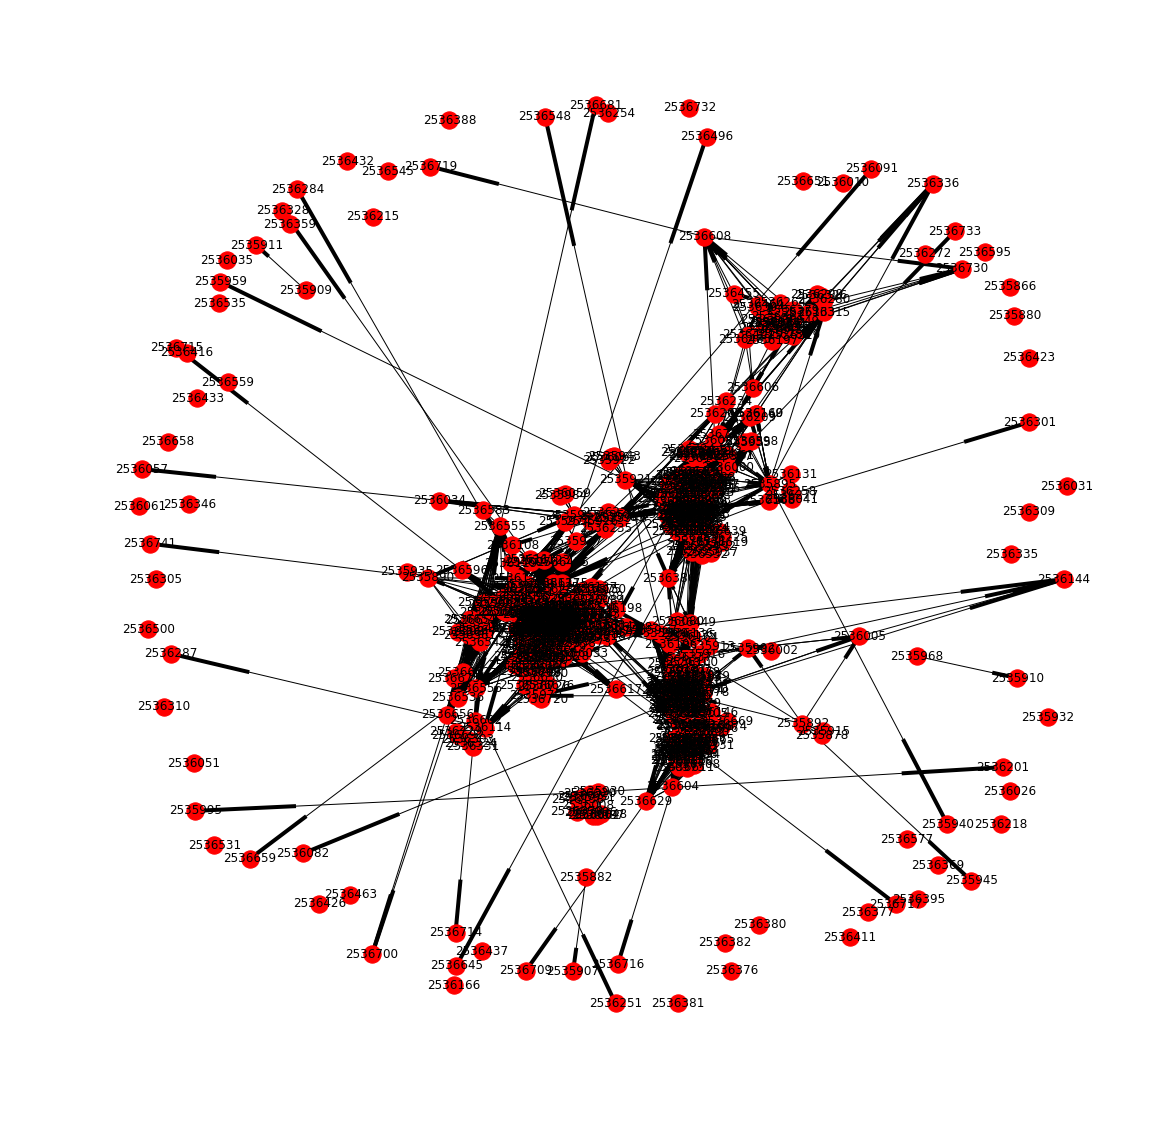

In [236]:
figure = plt.subplots(figsize = (20,20))
pos = nx.spring_layout(G)
nx.draw(G, pos = pos, with_labels=True)
plt.show()

In [237]:
len(G.nodes)

583

In [238]:
len(test.playerID.unique())

728

In [220]:
## plot degree distribution

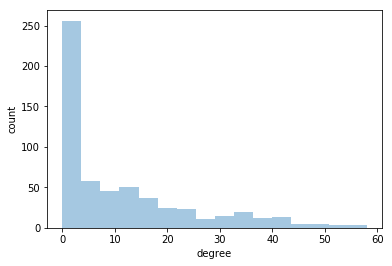

In [274]:
degrees = [G.out_degree(n) for n in G.nodes()]
sns.distplot(degrees, kde=False)
plt.xlabel('degree')
plt.ylabel('count')
plt.show()

In [ ]:
## plot neighbors

In [265]:
neighbors = []
for node in G.nodes():
    node_neighbors = [i for i in G.neighbors(node)]
    num_neighbors = len(set(node_neighbors))
    neighbors.append(num_neighbors)

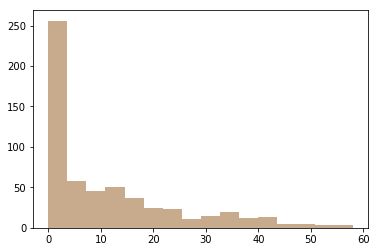

In [267]:
sns.distplot(neighbors, kde=False)
plt.show()